<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/GroupFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import

**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI3

In [2]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,normal,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [3]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [5]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF3

In [7]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,normal,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,normal,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,normal,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [8]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [10]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

In [12]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [14]:
!pip install scikeras

In [15]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#model

## Binary3

In [16]:
bi3_X = bi3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
bi3_y = bi3['Group']

In [17]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes','Group'], axis=1)
y = bi3['Group']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42017, 120)
Test set size: (10603, 120)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42274, 120)
Test set size: (10346, 120)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (41978, 120)
Test set size: (10642, 120)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42027, 120)
Test set size: (10593, 120)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42184, 120)
Test set size: (10436, 120)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



In [18]:
bi3_label_encoder = LabelEncoder()
bi3['Group'] = bi3_label_encoder.fit_transform(bi3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi3_all_folds = bi3['Fold'].unique()

bi3_accuracy_per_fold = []
bi3_conf_mat_list = []

bi3_precision_per_fold = []
bi3_recall_per_fold = []
bi3_f1_per_fold = []

bi3_loss_per_fold = []
bi3_all_train_loss = []
bi3_all_val_loss = []


In [19]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi3_all_folds)):
    train_folds = bi3_all_folds[train_folds]
    test_fold = bi3_all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == test_fold

    bi3_X_train, bi3_X_test = bi3_X[train_indices], bi3_X[test_indices]
    bi3_y_train, bi3_y_test = bi3_y[train_indices], bi3_y[test_indices]


    # Scale
    bi3_scaler = StandardScaler()
    bi3_X_train_scaled = bi3_scaler.fit_transform(bi3_X_train)
    bi3_X_test_scaled = bi3_scaler.transform(bi3_X_test)

    # Encode y_train and y_test

    bi3_y_train_one_hot = tf.keras.utils.to_categorical(bi3_y_train, num_classes=3)
    bi3_y_test_one_hot = tf.keras.utils.to_categorical(bi3_y_test, num_classes=len(bi3_label_encoder.classes_))

    # Build and compile the model
    bi3_model = Sequential([
        Dense(256, input_dim=bi3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(64, activation='relu'),
        Dropout(0.6),
        Dense(3, activation='softmax')
    ])

    bi3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi3_model.compile(optimizer=bi3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi3_history = bi3_model.fit(bi3_X_train_scaled, bi3_y_train_one_hot,
                                batch_size=32,
                                epochs=80,
                                verbose=0,
                                validation_data=(bi3_X_test_scaled, bi3_y_test_one_hot))

    # Evaluate on the test set
    bi3_scores = bi3_model.evaluate(bi3_X_test_scaled, bi3_y_test_one_hot, verbose=0)
    bi3_loss_per_fold.append(bi3_scores[0])

    # Store metrics for analysis
    bi3_all_train_loss.append(bi3_history.history['loss'])
    bi3_all_val_loss.append(bi3_history.history['val_loss'])

    bi3_y_pred = bi3_model.predict(bi3_X_test_scaled)
    bi3_y_pred_classes = np.argmax(bi3_y_pred, axis=1)
    bi3_conf_mat = confusion_matrix(bi3_y_test, bi3_y_pred_classes)
    bi3_conf_mat_list.append(bi3_conf_mat)

    bi3_accuracy = accuracy_score(bi3_y_test, bi3_y_pred_classes)
    bi3_precision = precision_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_recall = recall_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_f1 = f1_score(bi3_y_test, bi3_y_pred_classes, average='weighted')

    bi3_accuracy_per_fold.append(bi3_accuracy)
    bi3_precision_per_fold.append(bi3_precision)
    bi3_recall_per_fold.append(bi3_recall)
    bi3_f1_per_fold.append(bi3_f1)

    print(f"Table: bi3, Fold {fold + 1} - Loss: {bi3_loss_per_fold[-1]:.4f}, Accuracy: {bi3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi3_precision_per_fold[-1]:.4f}, Recall: {bi3_recall_per_fold[-1]:.4f}, F1-Score: {bi3_f1_per_fold[-1]:.4f}")

332/332 [==============================] - 1s 1ms/step
Table: bi3, Fold 1 - Loss: 1.0065, Accuracy: 51.84%
Precision: 0.3850, Recall: 0.5184, F1-Score: 0.4413


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


332/332 [==============================] - 1s 1ms/step
Table: bi3, Fold 2 - Loss: 1.0075, Accuracy: 52.67%
Precision: 0.3949, Recall: 0.5267, F1-Score: 0.4494


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


324/324 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Table: bi3, Fold 3 - Loss: 1.0045, Accuracy: 52.89%
Precision: 0.3960, Recall: 0.5289, F1-Score: 0.4519
327/327 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Table: bi3, Fold 4 - Loss: 1.0048, Accuracy: 52.39%
Precision: 0.3883, Recall: 0.5239, F1-Score: 0.4452
333/333 [==============================] - 1s 1ms/step
Table: bi3, Fold 5 - Loss: 0.9934, Accuracy: 52.80%
Precision: 0.3959, Recall: 0.5280, F1-Score: 0.4505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
import pandas as pd

# Create a DataFrame for performance metrics of each fold
fold_data = {
    "Fold": [f"Fold {fold+1}" for fold in range(len(bi3_accuracy_per_fold))],
    "Accuracy (%)": [accuracy * 100 for accuracy in bi3_accuracy_per_fold],
    "Precision": bi3_precision_per_fold,
    "Recall": bi3_recall_per_fold,
    "F1-Score": bi3_f1_per_fold
}

# Create DataFrame for fold performance
fold_performance_df = pd.DataFrame(fold_data).set_index("Fold")


# Calculate overall performance metrics
overall_metrics = {
    "Accuracy (%)": sum(bi3_accuracy_per_fold) / len(bi3_accuracy_per_fold) * 100,
    "Precision": sum(bi3_precision_per_fold) / len(bi3_precision_per_fold),
    "Recall": sum(bi3_recall_per_fold) / len(bi3_recall_per_fold),
    "F1-Score": sum(bi3_f1_per_fold) / len(bi3_f1_per_fold)
}

# Create DataFrame for overall performance
overall_performance_df = pd.DataFrame(overall_metrics, index=["Overall"])

# Concatenate fold performance DataFrame with overall performance DataFrame
result_df = pd.concat([fold_performance_df, overall_performance_df])

# Print the concatenated DataFrame
print("\nFNN Performance to classify Group on Binary3 :")
result_df



FNN Performance to classify Group on Binary3 :


,Accuracy (%),Precision,Recall,F1-Score
Fold 1,51.836118,0.384978,0.518361,0.441333
Fold 2,52.673772,0.394928,0.526738,0.449435
Fold 3,52.890006,0.396042,0.528900,0.451878
Fold 4,52.385972,0.388287,0.523860,0.445168
Fold 5,52.800226,0.395856,0.528002,0.450496
Overall,52.517219,0.392018,0.525172,0.447662


In [ ]:
explainer = shap.KernelExplainer(bi3_model.predict,bi3_X_train_scaled)
shap_values = explainer.shap_values(bi3_X_test_scaled,nsamples=100)

1312/1312 [==============================] - 3s 2ms/step


  0%|          | 0/10642 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


In [ ]:
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:]  ,X_test[0,:],feature_names=X.columns)

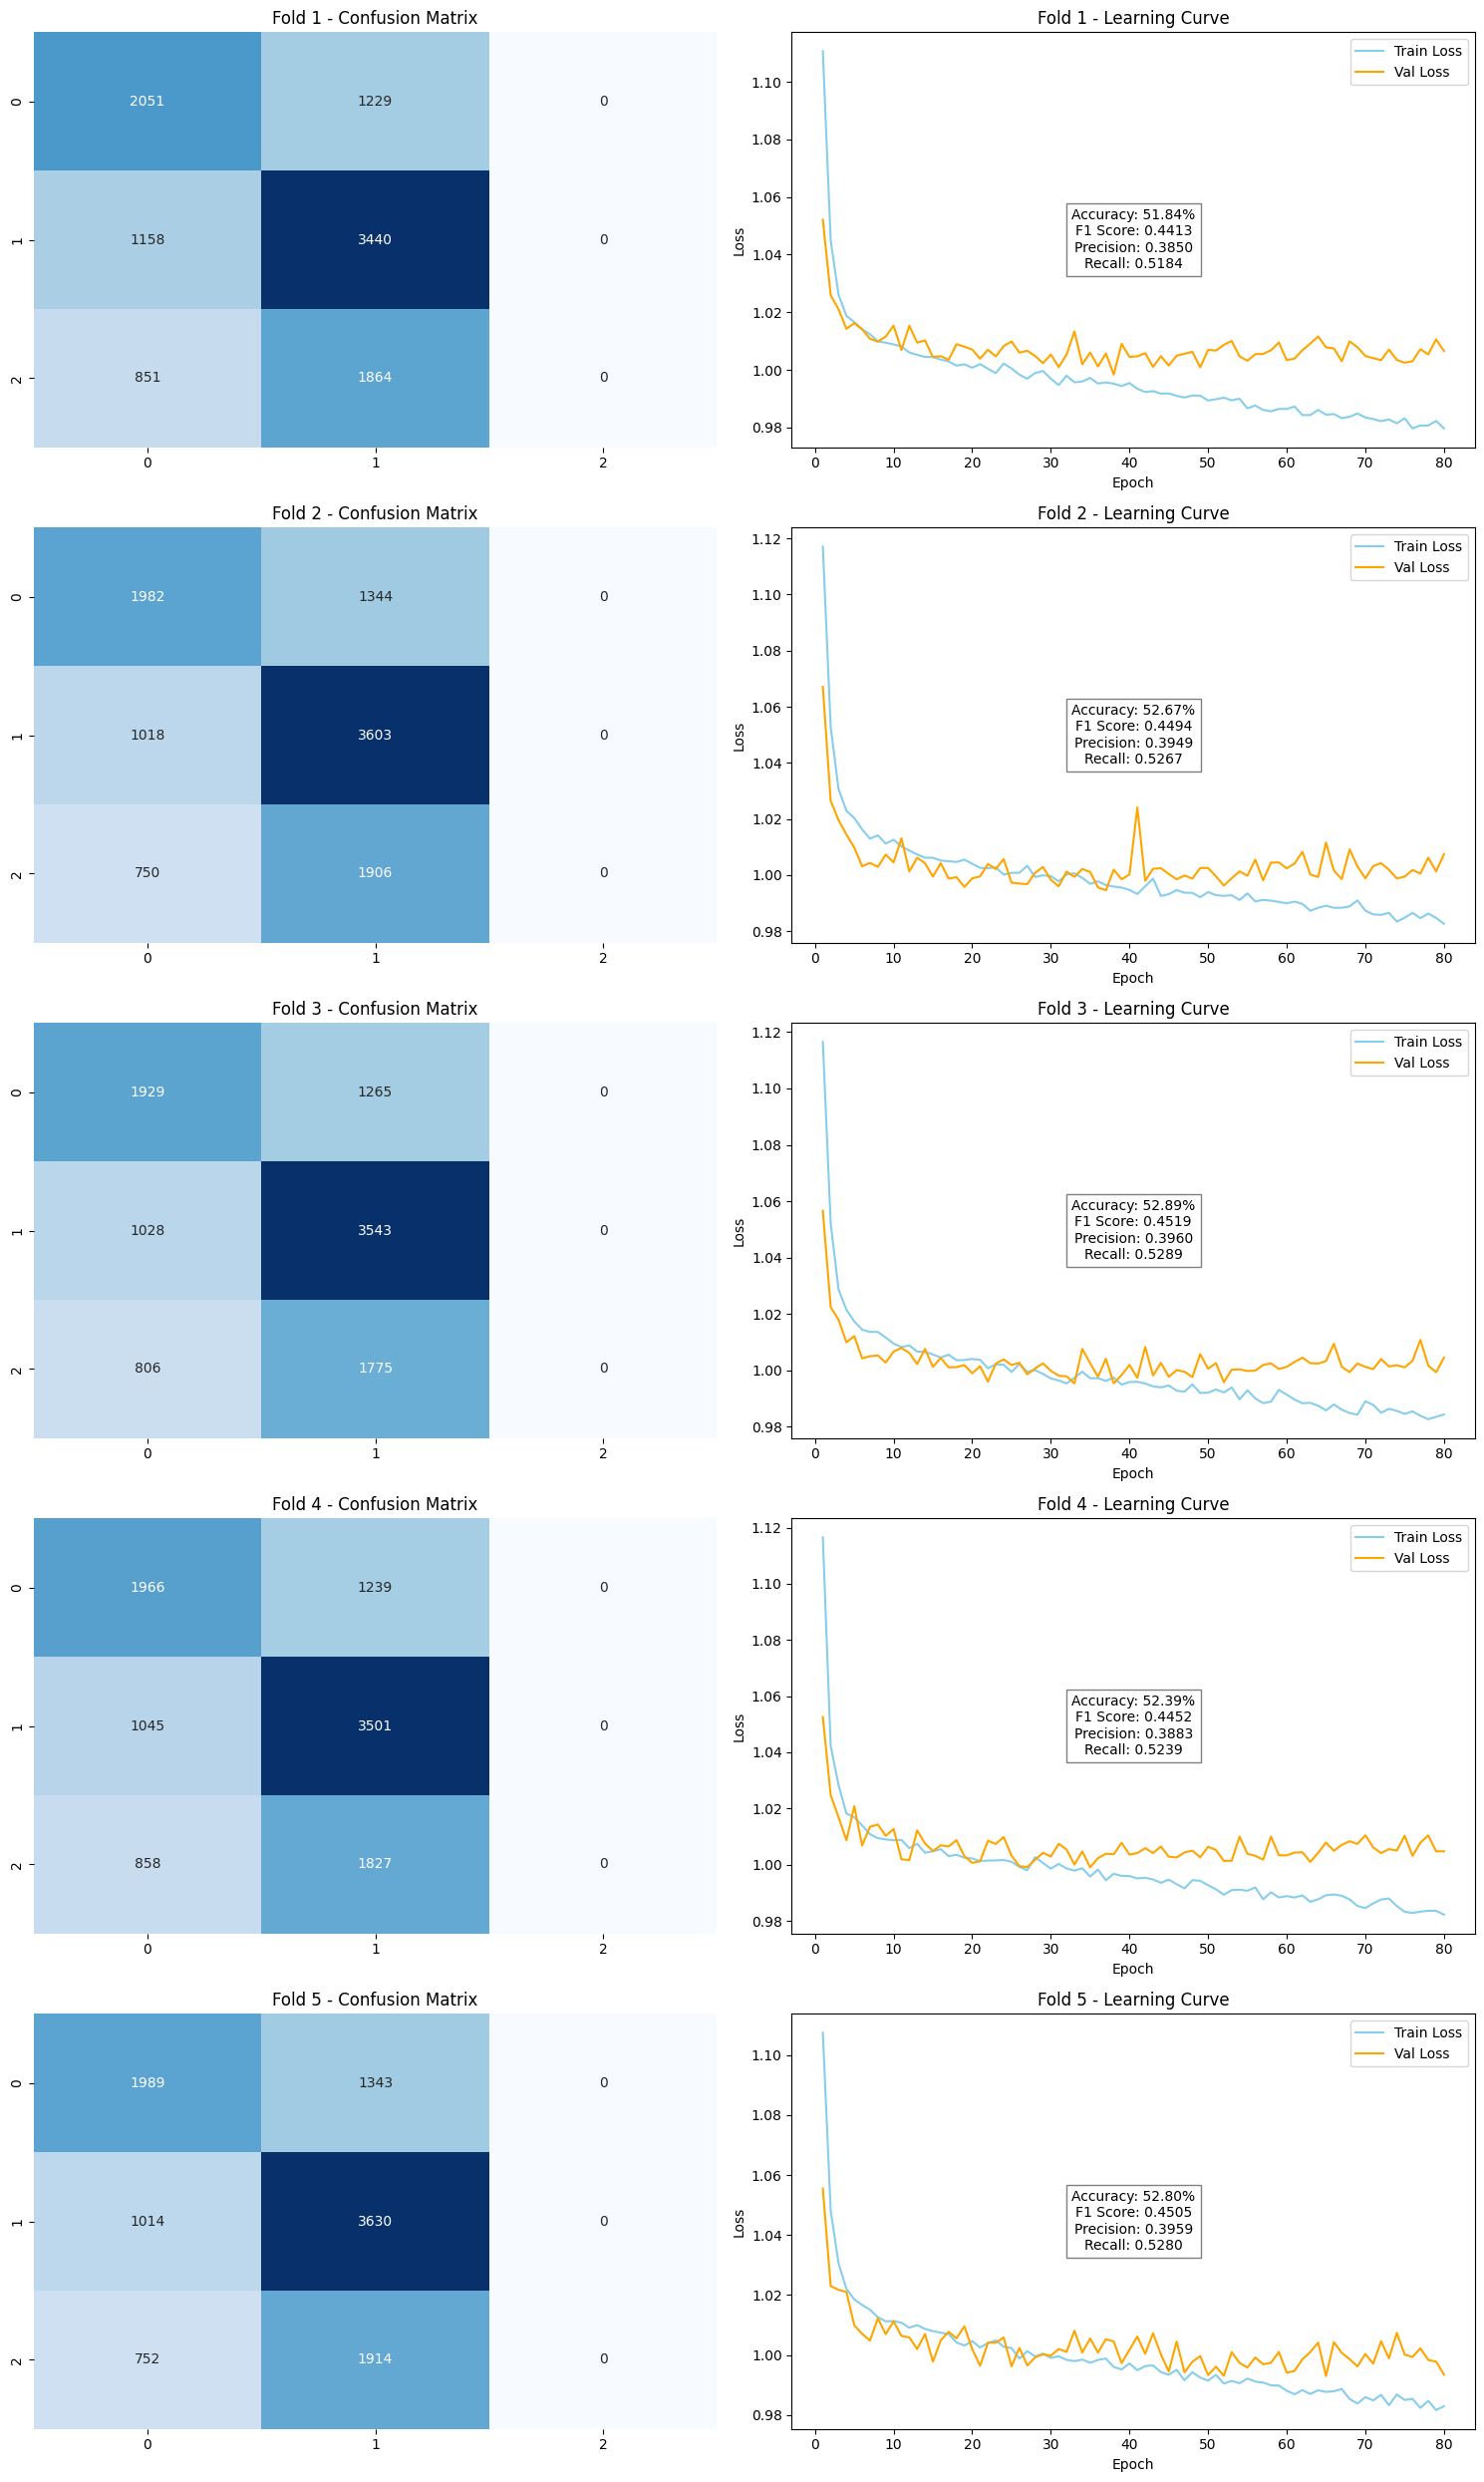

In [21]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi3_all_train_loss[fold]) + 1), bi3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi3_all_val_loss[fold]) + 1), bi3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi3_f1_per_fold[fold]:.4f}\nPrecision: {bi3_precision_per_fold[fold]:.4f}\nRecall: {bi3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()

## **Data3**

In [31]:
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
data3_y = data3['Group']

In [32]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes','Group'], axis=1)
y = data3['Group']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (41978, 74)
Test set size: (10642, 74)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42027, 74)
Test set size: (10593, 74)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42017, 74)
Test set size: (10603, 74)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42184, 74)
Test set size: (10436, 74)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42274, 74)
Test set size: (10346, 74)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---



In [33]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []
data3_all_train_loss = []
data3_all_val_loss = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []

data3_test_sample_list = []

In [34]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold

    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]

    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)

    # Encode y_train and y_test
    data3_y_train_one_hot = tf.keras.utils.to_categorical(data3_y_train, num_classes=3)
    data3_y_test_one_hot = tf.keras.utils.to_categorical(data3_y_test, num_classes=len(data3_label_encoder.classes_))

    # Build and compile the model
    data3_model = Sequential([
        Dense(256, input_dim=data3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(64, activation='relu'),
        Dropout(0.6),
        Dense(3, activation='softmax')
    ])

    data3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data3_model.compile(optimizer=data3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data3_history = data3_model.fit(data3_X_train_scaled, data3_y_train_one_hot,
                                    batch_size=32,
                                    epochs=80,
                                    verbose=0,
                                    validation_data=(data3_X_test_scaled, data3_y_test_one_hot))

    # Evaluate on the test set
    data3_scores = data3_model.evaluate(data3_X_test_scaled, data3_y_test_one_hot, verbose=0)
    data3_loss_per_fold.append(data3_scores[0])

    # Store metrics for analysis
    data3_all_train_loss.append(data3_history.history['loss'])
    data3_all_val_loss.append(data3_history.history['val_loss'])

    data3_y_pred = data3_model.predict(data3_X_test_scaled)
    data3_y_pred_classes = np.argmax(data3_y_pred, axis=1)
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred_classes)
    data3_conf_mat_list.append(data3_conf_mat)

    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred_classes)
    data3_precision = precision_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred_classes, average='weighted')

    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)

    print(f"Table: data3, Fold {fold + 1} - Loss: {data3_loss_per_fold[-1]:.4f}, Accuracy: {data3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data3_precision_per_fold[-1]:.4f}, Recall: {data3_recall_per_fold[-1]:.4f}, F1-Score: {data3_f1_per_fold[-1]:.4f}")


327/327 [==============================] - 1s 1ms/step
Table: data3, Fold 1 - Loss: 1.0075, Accuracy: 51.79%
Precision: 0.3962, Recall: 0.5179, F1-Score: 0.4311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


324/324 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Table: data3, Fold 2 - Loss: 1.0038, Accuracy: 52.35%
Precision: 0.3918, Recall: 0.5235, F1-Score: 0.4477
332/332 [==============================] - 1s 1ms/step
Table: data3, Fold 3 - Loss: 1.0103, Accuracy: 51.27%
Precision: 0.3910, Recall: 0.5127, F1-Score: 0.4279


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


333/333 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Table: data3, Fold 4 - Loss: 0.9991, Accuracy: 52.08%
Precision: 0.4041, Recall: 0.5208, F1-Score: 0.4357
332/332 [==============================] - 1s 1ms/step
Table: data3, Fold 5 - Loss: 1.0099, Accuracy: 51.45%
Precision: 0.4080, Recall: 0.5145, F1-Score: 0.4249


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


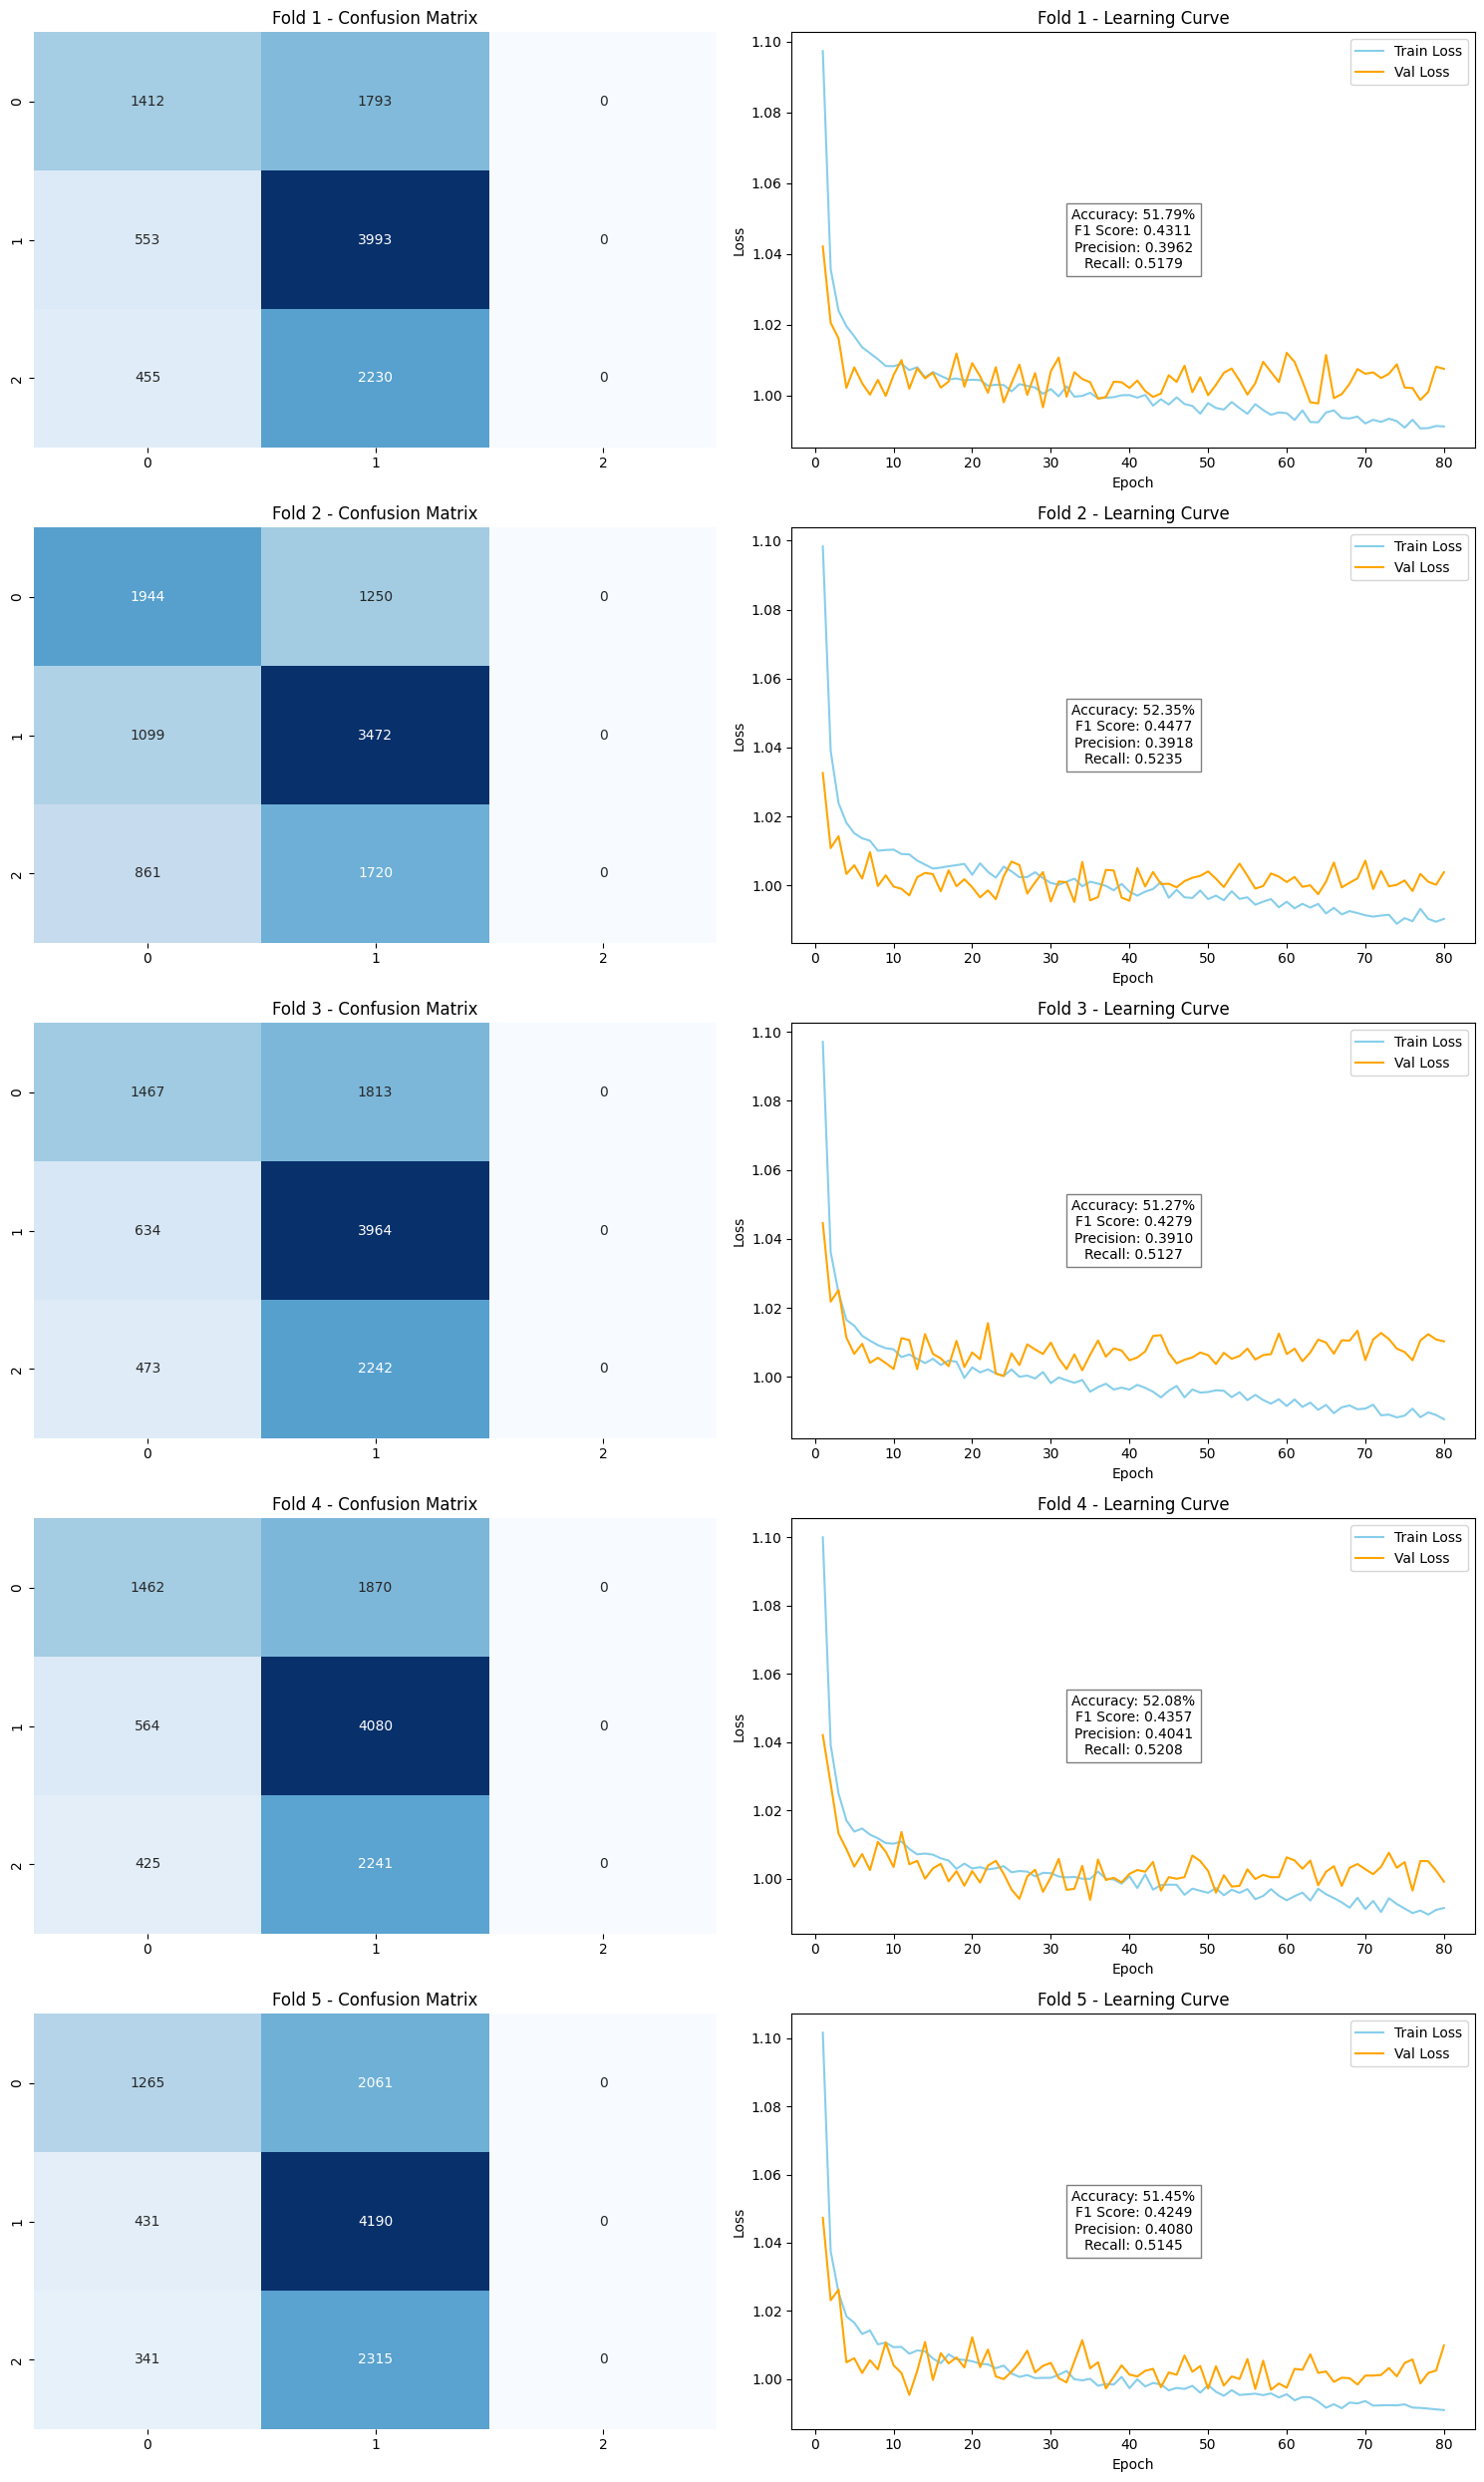

In [38]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data3_all_train_loss[fold]) + 1), data3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data3_all_val_loss[fold]) + 1), data3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data3_f1_per_fold[fold]:.4f}\nPrecision: {data3_precision_per_fold[fold]:.4f}\nRecall: {data3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Display the subplots
plt.tight_layout()
plt.show()


# **Cumulative confusion matrices**

In [40]:
cumulative_bi3_conf_mat

array([[ 9917,  6420,     0],
       [ 5263, 17717,     0],
       [ 4017,  9286,     0]])

In [41]:
cumulative_data3_conf_mat

array([[ 7550,  8787,     0],
       [ 3281, 19699,     0],
       [ 2555, 10748,     0]])

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative confusion matrices
cumulative_bi3_conf_mat = np.sum(binary3_conf_mat_list, axis=0)
cumulative_data3_conf_mat = np.sum(data3_conf_mat_list, axis=0)

class_labels_3 = ['Rapid', 'Normal', 'Prevention']

# Plotting subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Set the title for the entire figure
fig.suptitle('Confusion Matrices for FNN Model', fontsize=18, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'), weight='bold', va='top')

# Plot cumulative confusion matrices for 2 Classes
sns.heatmap(cumulative_bi3_conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], xticklabels=class_labels_3, yticklabels=class_labels_3)
axes[0].set_title('Cumulative Confusion Matrix (Binary3)')

# Plot cumulative confusion matrices for 3 Classes
sns.heatmap(cumulative_data3_conf_mat, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1], xticklabels=class_labels_3, yticklabels=class_labels_3)
axes[1].set_title('Cumulative Confusion Matrix (Data3)')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


NameError: name 'bi3_conf_mat_list' is not defined

**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303